In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
df=pd.read_csv('student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape


(25, 2)

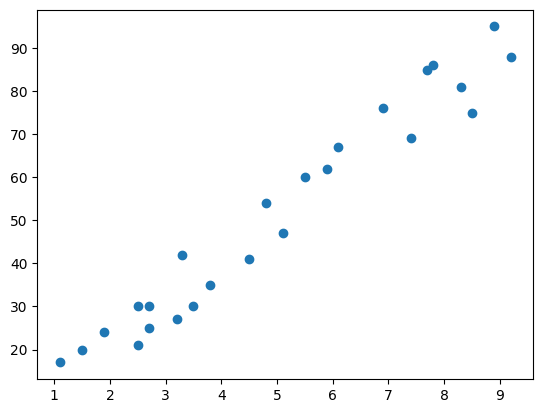

In [7]:
plt.scatter(x='Hours',y='Scores',data=df)

In [10]:
x=df.drop(columns=['Scores'],axis=1)
y=df['Scores']
y


0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [12]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

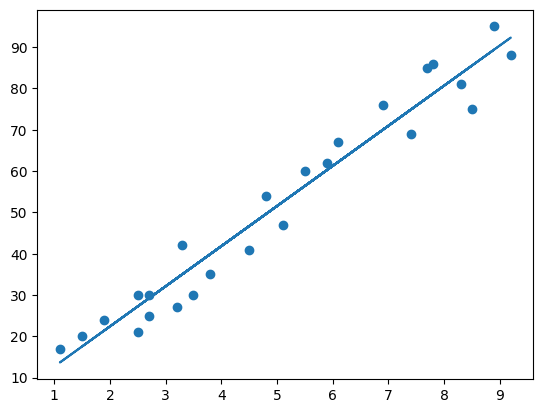

In [14]:
line = regressor.coef_*x+regressor.intercept_

plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [16]:
y_pred = regressor.predict(x_test)

In [17]:
df_comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_comp

,Actual,Predicted
15,95,89.400071
3,75,85.516853
0,21,27.268573
20,30,29.210183
23,76,69.983978


In [20]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.79788749109898


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
regressor.score(x_test,y_test)

0.9471359608424297

In [22]:
#or anotherr way to check the performance of the model
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',
      metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.838238784713979
Mean Squared Error: 43.614946866561816
Root Mean Squared Error: 6.6041613295377495
